In [101]:
import os
import glob
import pandas as pd
import numpy as np
import pickle

import matplotlib
import matplotlib.pyplot as plt


import seaborn as sns

from sklearn.ensemble import RandomForestRegressor


%matplotlib inline


path = "/Users/yan/Documents/govhack/data/Allyearssamplefile/all_data"

all_files = glob.glob(os.path.join(path,"*.txt"))

print all_files
from math import sqrt

['/Users/yan/Documents/govhack/data/Allyearssamplefile/all_data/2003-04.txt', '/Users/yan/Documents/govhack/data/Allyearssamplefile/all_data/2004-05.txt', '/Users/yan/Documents/govhack/data/Allyearssamplefile/all_data/2005-06.txt', '/Users/yan/Documents/govhack/data/Allyearssamplefile/all_data/2008-09.txt', '/Users/yan/Documents/govhack/data/Allyearssamplefile/all_data/2009-10.txt', '/Users/yan/Documents/govhack/data/Allyearssamplefile/all_data/2010-11.txt', '/Users/yan/Documents/govhack/data/Allyearssamplefile/all_data/2011-12.txt', '/Users/yan/Documents/govhack/data/Allyearssamplefile/all_data/2012-13.txt', '/Users/yan/Documents/govhack/data/Allyearssamplefile/all_data/2013-14.txt', '/Users/yan/Documents/govhack/data/Allyearssamplefile/all_data/2014-15.txt', '/Users/yan/Documents/govhack/data/Allyearssamplefile/all_data/wtf.txt']


# 1.0 Misc functions

In [110]:
from sklearn.linear_model import Ridge, RANSACRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler 
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error

#linear_model.RANSACRegressor

def train_test_measure_reg(df, model, l_col, f_cols, scale_f=False, poly_f=False, picklize=False):
    """
    In: df        - DataFrame object that we want to learn from
        model     - sklearn ML object
        l_col     - label column name
        f_cols    - list of feature column names
        
    Out: tuple of mse and pred-true pairing DataFrame
    """
    
    X = df[f_cols].values
    y = df[l_col].tolist()
    
    X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.7, random_state=42)
    
    
    if poly_f:
        X_train, X_test = _transform(X_train, X_test, PolynomialFeatures())
        
    if scale_f:
        X_train, X_test = _transform(X_train, X_test, StandardScaler())
    
    reg = model
    reg.fit(X_train, y_train)
    
    if picklize:
        pickle.dump(reg, open("reg_baseline.p", "wb"))
        
    
    pred = reg.predict(X_test)
    
    
    pred_df = pd.DataFrame(data = {'pred': pred, 'true': y_test}, columns = ['pred', 'true'])
    mse = mean_squared_error(y_test, pred)
    return sqrt(mse), pred_df


def _transform(X_train, X_test, transformer):
    tr = transformer.fit(X_train)
    
    X_train = tr.transform(X_train)
    X_test = tr.transform(X_test)
    
    return X_train, X_test 

def visualise_preds(data, n=10000, xy_range = False, x_range=(-4, 4), y_range=(-4, 4)):
    data = data.sample(n=n)

    fig, ax = plt.subplots(figsize=(20, 12))
    if xy_range:
        plt.xlim(x_range[0], x_range[1])
        plt.ylim(y_range[0], y_range[1])
    sns.regplot(x='pred', y='true', data=data, scatter=True)
    plt.draw()

In [59]:
df_list = []
for file_ in all_files:
    #print len(df), file_
    df = pd.read_csv(file_, index_col=None, header=0)
    df_list.append(df)

#df_list

In [58]:
df_col_vals = list(df_list[0].columns.values)

crap_files = []
good_files = []

for df in df_list:
    #print len(df)
    if df_col_vals != list(df.columns.values):
        real_df_col_vals = set(df_col_vals)
        this_df_col_vals = set(df.columns.values)
    
        #print "{len(real_df_col_vals.difference(this_df_col_vals))}".format(len(real_df_col_vals.difference(this_df_col_vals)))
        #print "{len(real_df_col_vals.difference(this_df_col_vals))}".format(len(real_df_col_vals.difference(this_df_col_vals)))
        #print "len: {}\nunion: {}\n".format(len(real_df_col_vals.union(this_df_col_vals)), real_df_col_vals.union(this_df_col_vals))

In [42]:
cols = ['NPP_loss_claimed', 'Taxed_othr_pnsn_amt', 'Net_rent_amt', 'Marital_status', 'Untaxed_othr_pnsn_amt', 'Othr_pnsn_amt', 'Grs_int_amt', 'PHI_Ind', 'Tot_inc_amt', 'WRE_other_amt', 'Tot_CY_CG_amt', 'Sw_amt', 'Total_PP_BE_amt', 'Gift_amt', 'Region', 'Taxable_Income', 'Net_NPP_BI_amt', 'Other_rent_ded_amt', 'HECS_accum_ind', 'Net_PT_NPP_dsn', 'Alow_ben_amt', 'Ind', 'Total_NPP_BI_amt', 'Lodgment_method', 'Net_CG_amt', 'Aust_govt_pnsn_allw_amt', 'Total_NPP_BE_amt', 'WRE_self_amt', 'Frk_Div_amt', 'Int_Div_ded_amt', 'Occ_code', 'WRE_trvl_amt', 'Other_inc_amt', 'Net_PT_PP_dsn', 'Rep_frng_ben_amt', 'Rent_cap_wks_amt', 'Gender', 'Other_foreign_inc_amt', 'Gross_rent_amt', 'WRE_uniform_amt', 'Total_PP_BI_amt', 'Birth_year', 'Other_Ded_amt', 'Net_PP_BI_amt', 'Tot_ded_amt', 'Non_emp_spr_amt', 'WRE_car_amt', 'Rent_int_ded_amt', 'Med_Exp_TO_amt', 'Cost_tax_affairs_amt', 'PP_loss_claimed']

In [51]:
fname = "/Users/yan/Documents/govhack/data/Allyearssamplefile/all_data/2014-15.txt"
df_2015 = pd.read_csv(fname, index_col=None, header=0)
#df = pd.read_csv(file_, index_col=None, header=0)

In [134]:
#df_2015_filtered = df_2015[cols]

#print df_2015.head()

fcols = ['Gender', 'age_range', 
         'Partner_status', 'Region', 'Sw_amt', 
         'Alow_ben_amt', 'ETP_txbl_amt', 
         'Grs_int_amt', 'Aust_govt_pnsn_allw_amt',
         'Unfranked_Div_amt','Frk_Div_amt',
         'Dividends_franking_cr_amt', 'Net_rent_amt',
         'Gross_rent_amt', 'Other_rent_ded_amt',
         'Rent_int_ded_amt', 'Rent_cap_wks_amt',
         'Net_farm_management_amt','Net_PP_BI_amt',
         'Net_NPP_BI_amt','Total_PP_BI_amt',
         'Total_NPP_BI_amt','Total_PP_BE_amt',
         'Total_NPP_BE_amt','Net_CG_amt',
         'Tot_CY_CG_amt','Net_PT_PP_dsn',
         'Net_PT_NPP_dsn','Taxed_othr_pnsn_amt',
         'Untaxed_othr_pnsn_amt','Other_foreign_inc_amt',
         'Other_inc_amt', 'Tot_inc_amt']

fcols = ['Taxable_Income', 'Sw_amt']



extra = 'Occ_code', 'Lodgment_method', 'PHI_Ind'


label = 'Tot_ded_amt'
model = Ridge()

mse, pred_df_base = train_test_measure_reg(df_2015, model, label, fcols, scale_f=False, poly_f=False, picklize=True)
print mse

7073.52690109


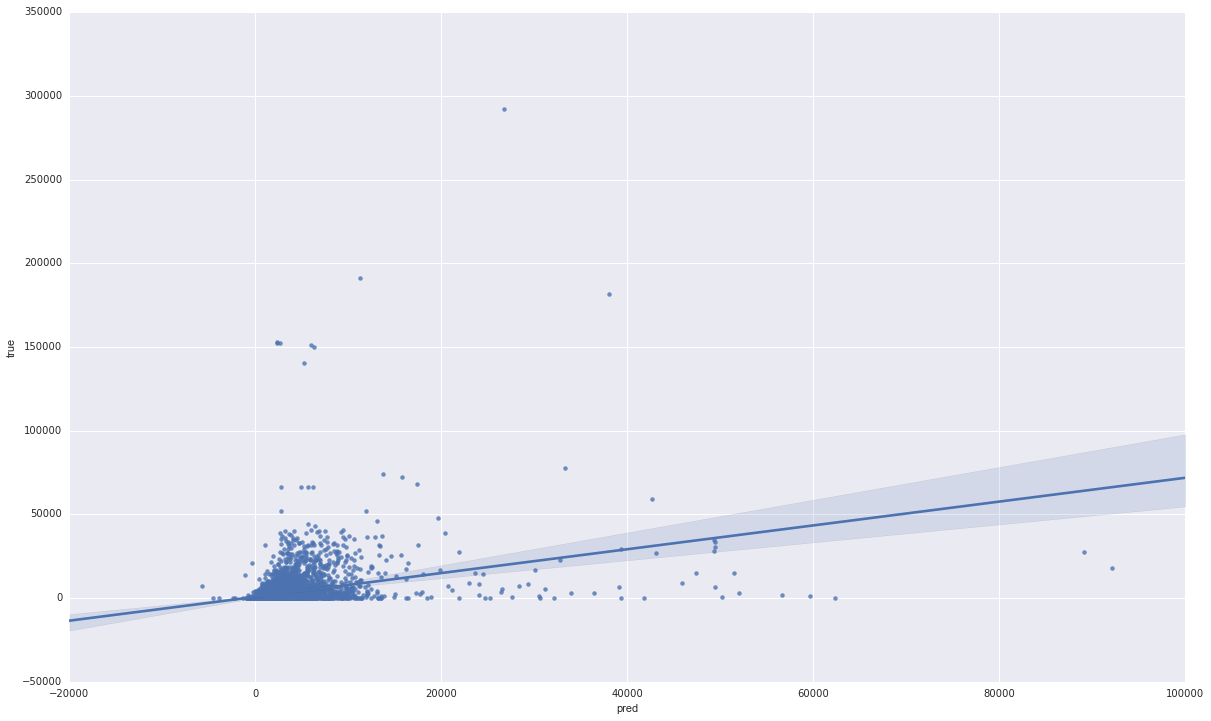

In [136]:
visualise_preds(pred_df_base, n = 10000, xy_range = False, x_range=(0, 10000), y_range=(0, 10000))

In [ ]:

s = pickle.dumps(clf)
clf2 = pickle.loads(s)
clf2.predict(X[0:1])

pickle.dump(favorite_color, open( "save.p", "wb" ))